# อ่านฝนโมเสคแล้วพลอตแผนที่ฝนรายชั่วโมง 2 x 4 ภาพ

C:\Users\Admin\AppData\Local\Temp\ipykernel_16252\1564037988.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


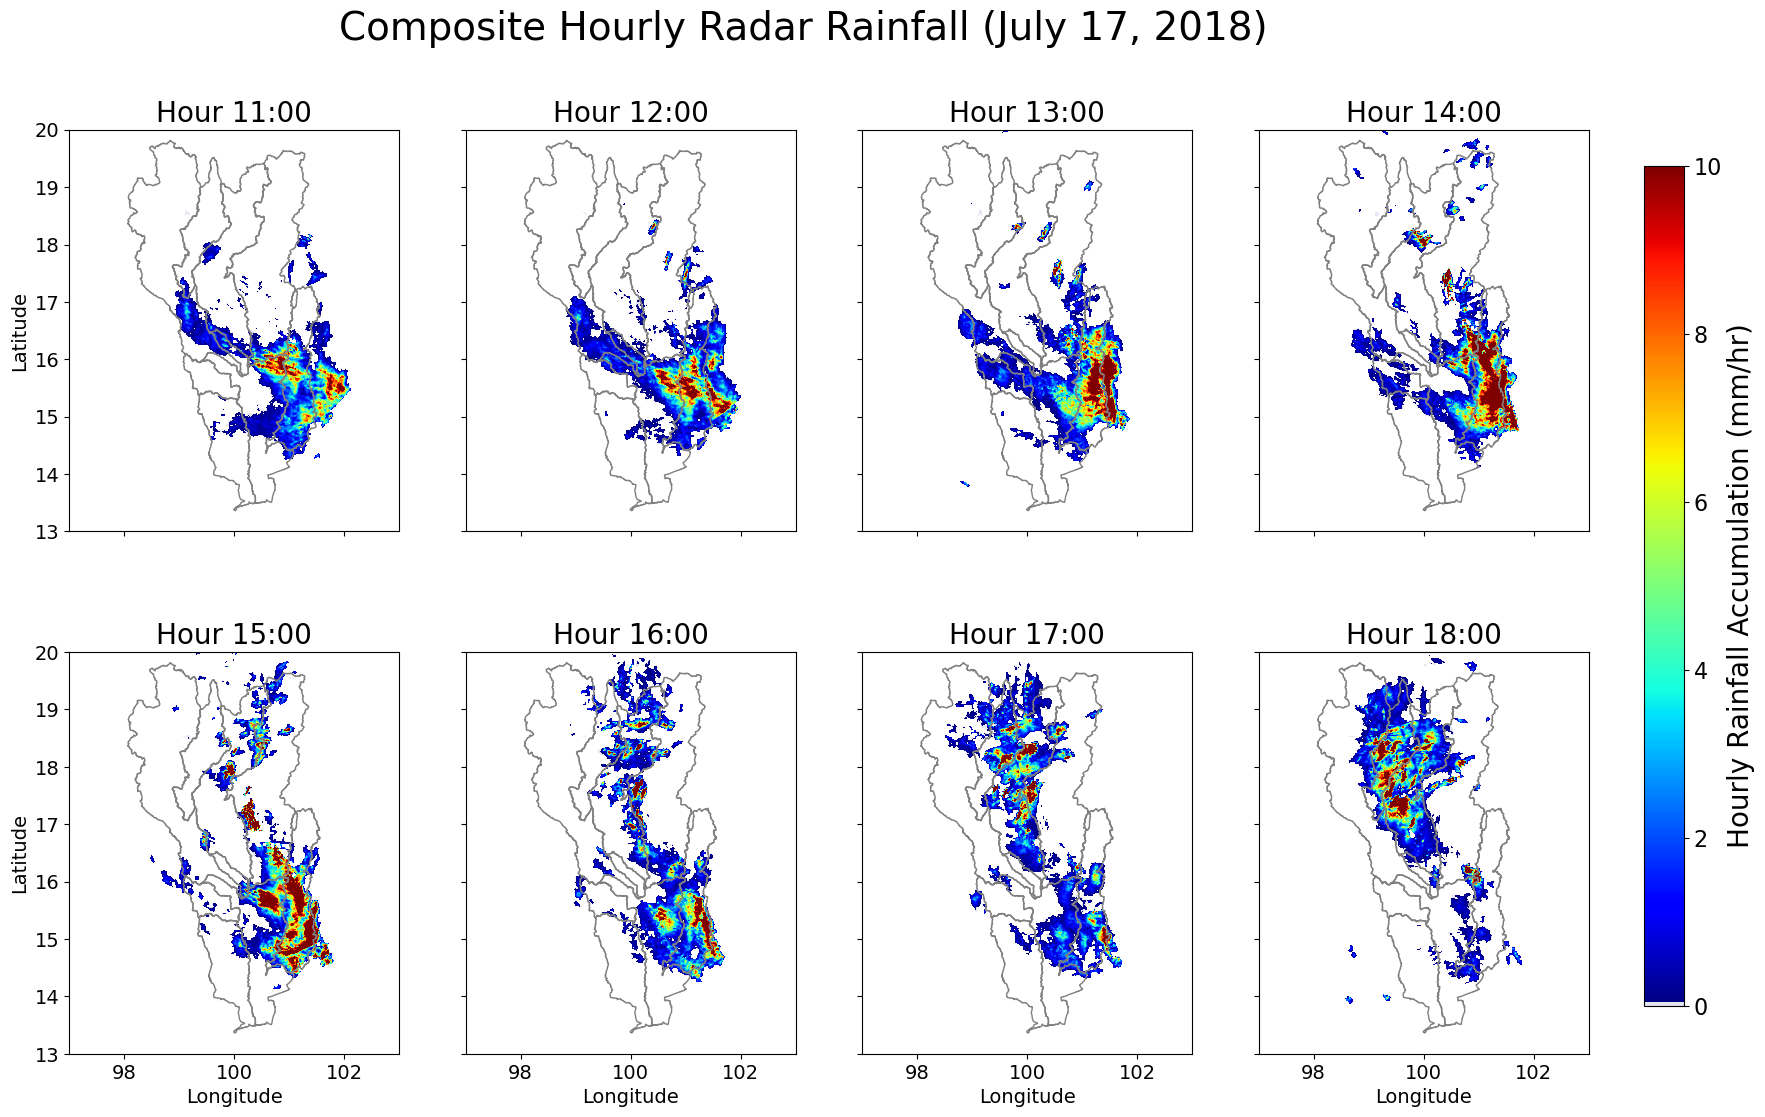

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import rasterio
import geopandas as gpd
from matplotlib.gridspec import GridSpec
from datetime import datetime, timedelta

def read_geotiff(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)
        bounds = src.bounds
    return data, bounds

def generate_file_paths(initial_hour, base_path):
    initial_datetime = datetime.strptime(initial_hour, "%Y%m%d%H")
    file_paths = []
    for i in range(8):
        current_datetime = initial_datetime + timedelta(hours=i)
        file_name = f"{current_datetime.strftime('%Y%m%d%H')}_2000m.tif"
        file_paths.append(f"{base_path}/{file_name}")
    return file_paths

cmap = plt.get_cmap('jet')
colors = cmap(np.arange(cmap.N))
colors[0, -1] = 0.1
custom_cmap = ListedColormap(colors)

# Specify the initial hour and base path
initial_hour = "2018071711"  # YYYYMMDDHH format ใส่เวลาเริ่มต้นตรงนี้
base_path = '../00run_batch_acchr_codes/2output/0Hourly/0Sontihn_RF/0CBB_Pulse/0output_mosaic/'

selected_hours = generate_file_paths(initial_hour, base_path)

basin_shape = gpd.read_file('../1data/1GIS/0base_map_gis/Chaophraya_Basins_others_ONWR_Law_WGS84Geo.shp')

fig = plt.figure(figsize=(20, 12))  # Increased figure size
gs = GridSpec(2, 4, figure=fig, wspace=0.1, hspace=0.3)  # Increased vertical space

for i, file_path in enumerate(selected_hours):
    data, bounds = read_geotiff(file_path)
    
    ax = fig.add_subplot(gs[i // 4, i % 4])
    
    masked_data = np.ma.masked_where(data == 0, data)
    
    im = ax.imshow(masked_data, cmap=custom_cmap, vmin=0, vmax=10, 
                   extent=[bounds.left, bounds.right, bounds.bottom, bounds.top], 
                   aspect='auto', origin='upper')
    
    basin_shape.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=1)
    
    hour = (int(initial_hour[-2:]) + i) % 24
    ax.set_title(f"Hour {hour:02d}:00", fontsize=20)  # Doubled font size
    ax.set_xlim(97, 103)
    ax.set_ylim(13, 20)
    
    # Add coordinate labels with doubled font size
    #ax.text(97.2, 19.8, "20°", fontsize=16, ha='left', va='top', color='black')
    #ax.text(97.2, 13.2, "14°", fontsize=16, ha='left', va='bottom', color='black')
    #ax.text(97.2, 16.5, "17°", fontsize=16, ha='left', va='center', color='black')
    #ax.text(99, 13.2, "99°", fontsize=16, ha='center', va='bottom', color='black')
    #ax.text(102, 13.2, "102°", fontsize=16, ha='center', va='bottom', color='black')
    
    if i % 4 == 0:
        ax.set_ylabel("Latitude", fontsize=14)  # Doubled font size
    else:
        ax.set_yticklabels([])
    
    if i // 4 == 1:
        ax.set_xlabel("Longitude", fontsize=14)  # Doubled font size
    else:
        ax.set_xticklabels([])
    
    ax.tick_params(axis='both', which='major', labelsize=14)  # Doubled font size

# Add a single colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Hourly Rainfall Accumulation (mm/hr)", fontsize=20)  # Doubled font size
cbar.ax.tick_params(labelsize=16)  # Doubled font size

initial_datetime = datetime.strptime(initial_hour, "%Y%m%d%H")
plt.suptitle(f"Composite Hourly Radar Rainfall ({initial_datetime.strftime('%B %d, %Y')})", fontsize=28, y=0.98)  # Doubled font size
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()